Index(['bigram_js_divergence', 'depth_of_parse_tree', 'gpt2_perplexity',
       'gpt2_tokens_per_char', 'named_entities', 'pos_bigram_js_divergence',
       'pos_js_divergence', 'unigram_js_divergence', 'ser', 'text_length'],
      dtype='object')


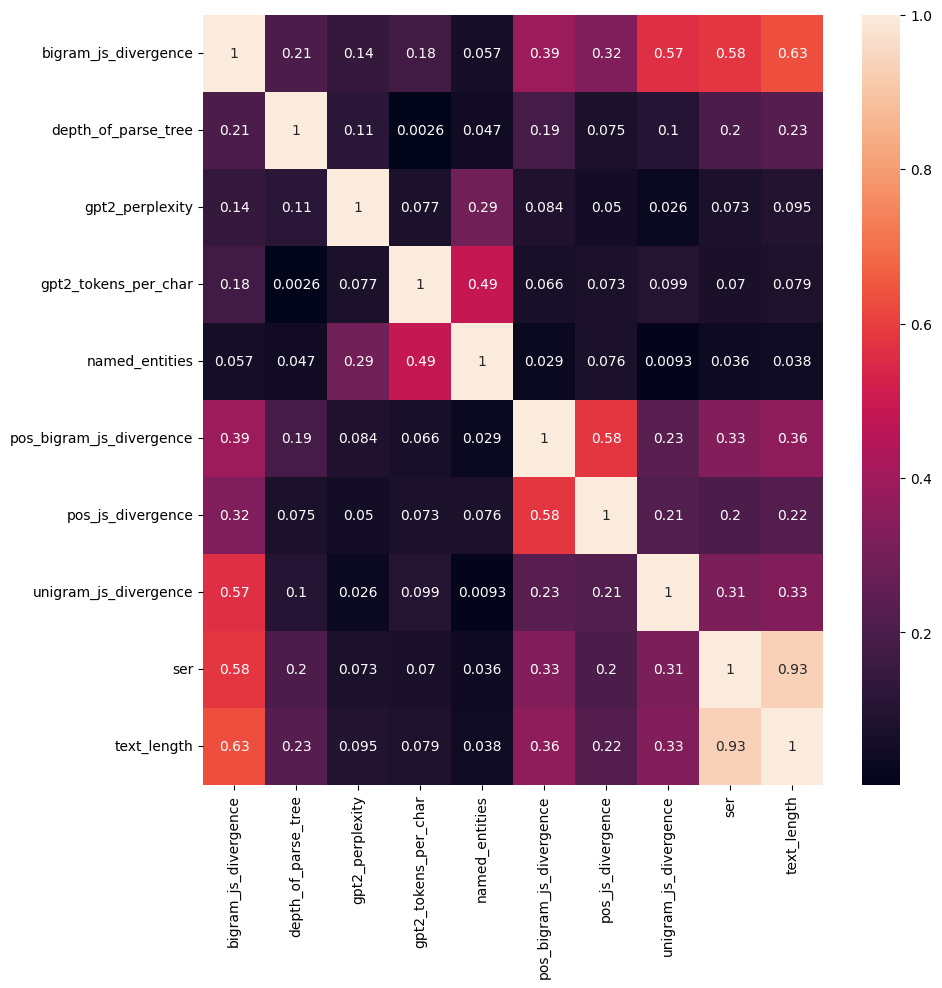

[0.0, 0.0, 1.7775115186719747e-117, 8.455167907630676e-108, 0.0, 0.0, 0.0, 7.406744360315008e-30]


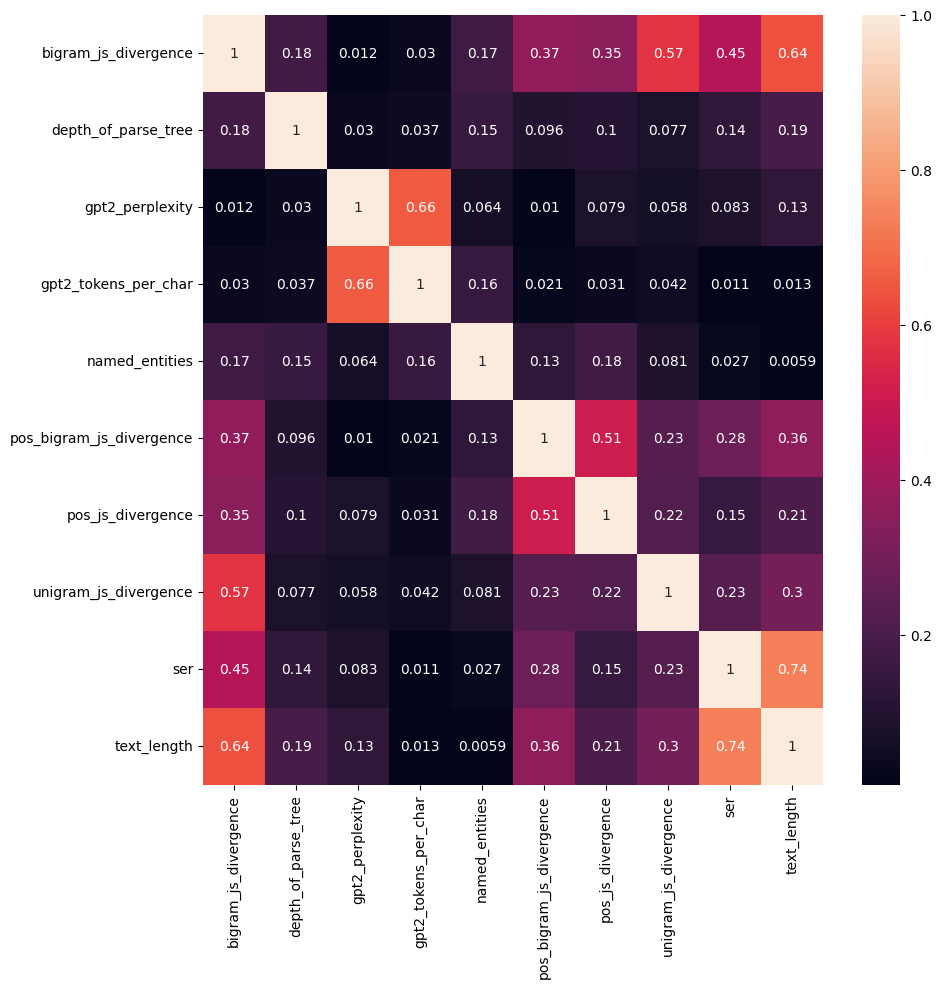

[0.0, 0.0, 8.857715645569567e-152, 0.0005150701890229097, 0.0, 0.0, 0.0, 5.833037333106895e-18]


In [13]:
import numpy as np
import pandas as pd
# we have 3d analysis
languages = ['en', 'de', 'cs']
features = ['unigram_js_divergence', 'bigram_js_divergence', 'gpt2_perplexity', 'gpt2_tokens_per_char', 'pos_js_divergence', 'pos_bigram_js_divergence', 'depth_of_parse_tree', 'named_entities']
# other columns include text, generated_text, original_text, error_count

data_en = pd.read_csv('news.2013.en.trainlen.200.evaluation.100000.csv')
# data_de = pd.read_csv('news.2013.de.trainlen.200.evaluation.100000.csv')
data_cs = pd.read_csv('news.2013.cs.trainlen.200.evaluation.100000.csv')

#add symbol error rate column calculated from text and generated text

data_en['ser'] = data_en.apply(lambda row: 1 - (len(row['text']) - row['error_count']) / len(row['text']), axis=1)
data_cs['ser'] = data_cs.apply(lambda row: 1 - (len(row['text']) - row['error_count']) / len(row['text']), axis=1)
# add column for length of text
data_en['text_length'] = data_en.apply(lambda row: len(row['text']), axis=1)
data_cs['text_length'] = data_cs.apply(lambda row: len(row['text']), axis=1)

# add first 100 symbol error rate... that seems even more relevant


# drop column error count
data_en = data_en.drop(columns=['error_count'])
data_cs = data_cs.drop(columns=['error_count'])
# drop all bool columns in genearalized way
data_en = data_en.drop(columns=data_en.columns[data_en.dtypes == bool])
data_cs = data_cs.drop(columns=data_cs.columns[data_cs.dtypes == bool])
# drop all columns that are not a float or int in a generalized way
data_en = data_en.drop(columns=data_en.columns[data_en.dtypes == object])
data_cs = data_cs.drop(columns=data_cs.columns[data_cs.dtypes == object])

# print col_names
print(data_en.columns)

# make the column order same in both dataframes
data_cs = data_cs[data_en.columns]


# create absolute correlation matrix for all columns of the data excluding textual fields
corr_matrix = data_en.corr().abs()
# plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# do pvalues for correlations with ser
from scipy.stats import pearsonr
pvalues = []
for feature in features:
    pvalues.append(pearsonr(data_en[feature], data_en['ser'])[1])

print(pvalues)

# now cs
corr_matrix_cs = data_cs.corr().abs()
# plot
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix_cs, annot=True)
plt.show()

# do pvalues for correlations with ser
pvaluescs = []
for feature in features:
    pvaluescs.append(pearsonr(data_cs[feature], data_cs['ser'])[1])

print(pvaluescs)






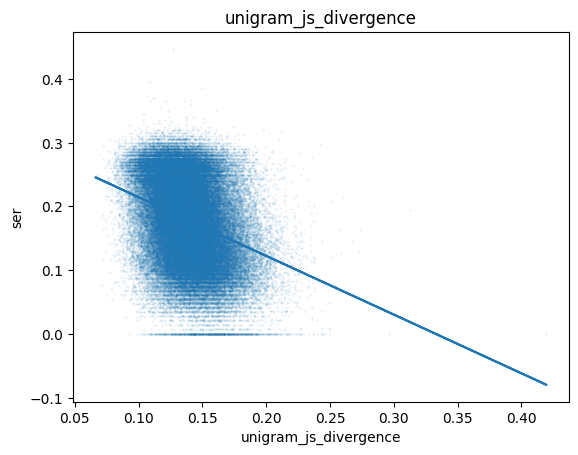

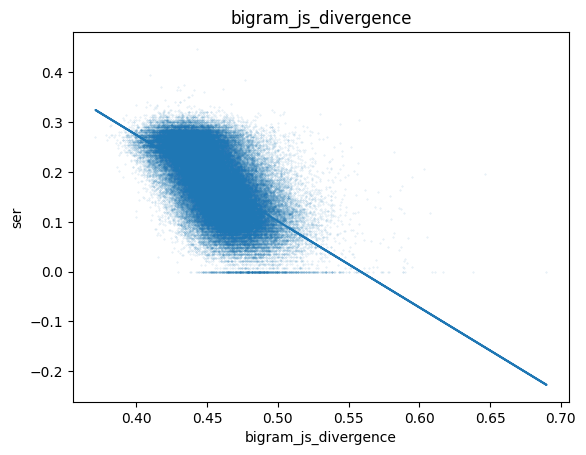

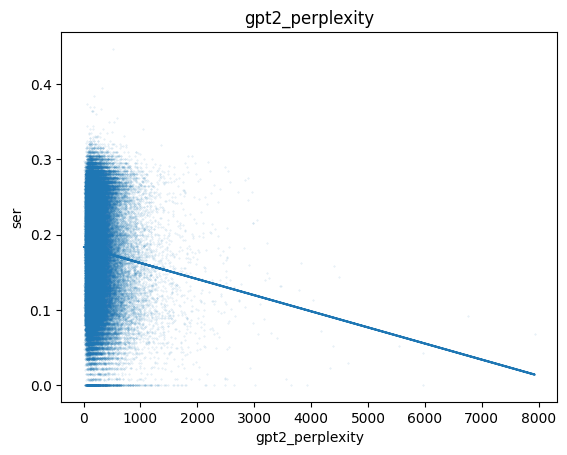

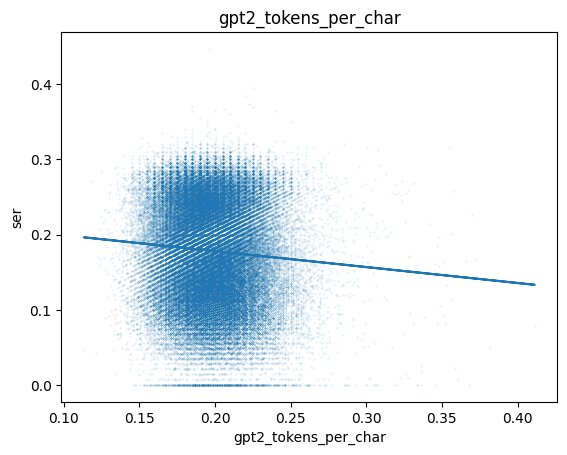

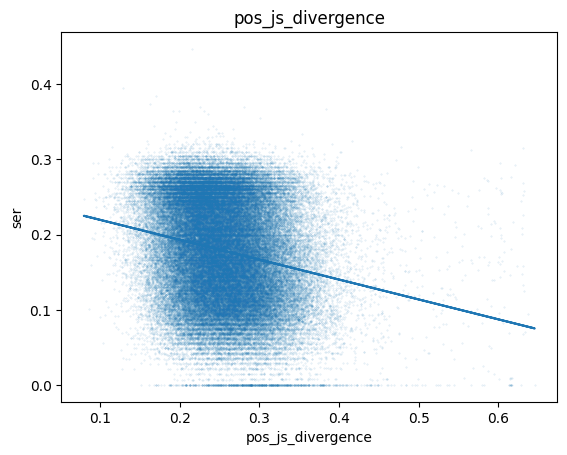

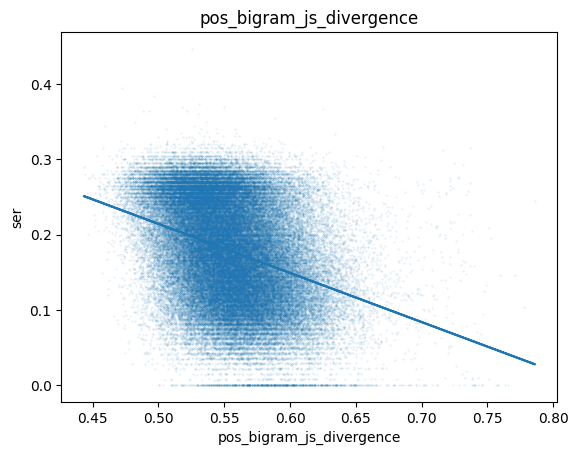

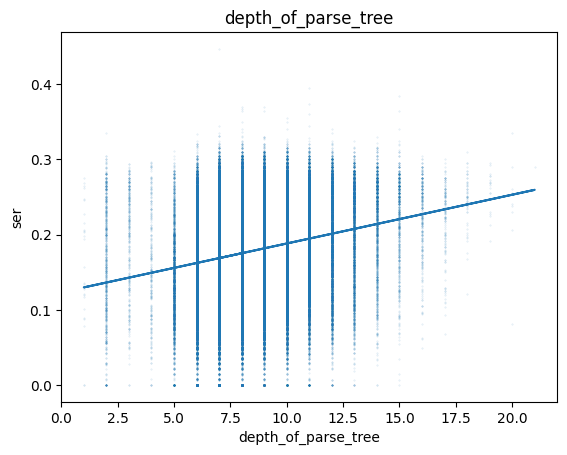

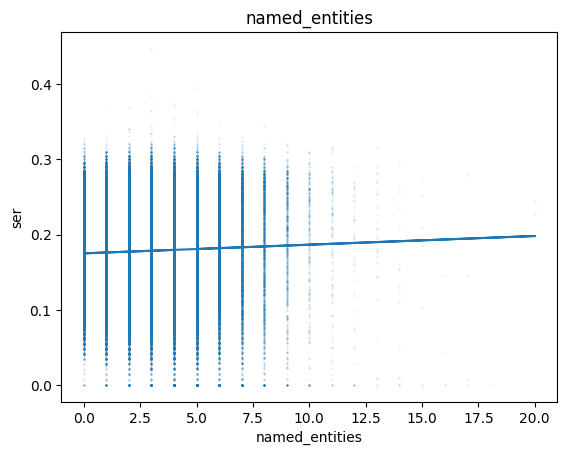

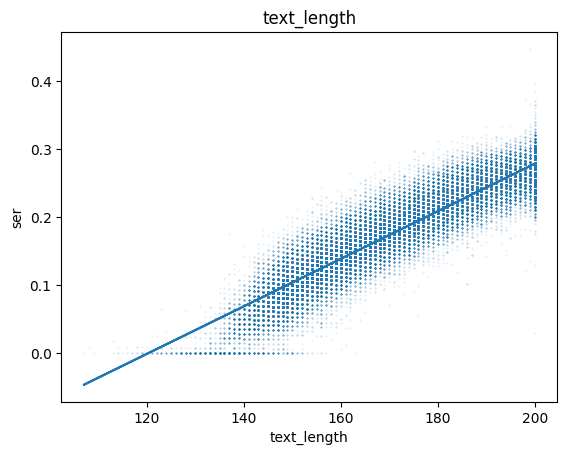

In [15]:
# do  scatterplots where is a feature and y is ser, do it somehow so it's visible where concentration is higher and where lower


features.append('text_length')
for feature in features:
    plt.scatter(data_en[feature], data_en['ser'], s=.1, alpha=.2)
    plt.xlabel(feature)
    plt.ylabel('ser')
    # draw a regression line through the data
    m, b = np.polyfit(data_en[feature], data_en['ser'], 1)
    plt.plot(data_en[feature], m*data_en[feature] + b)
    plt.title(feature)
    plt.show()



    



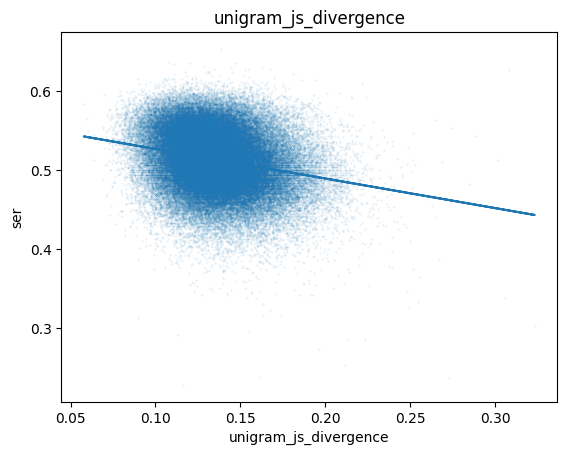

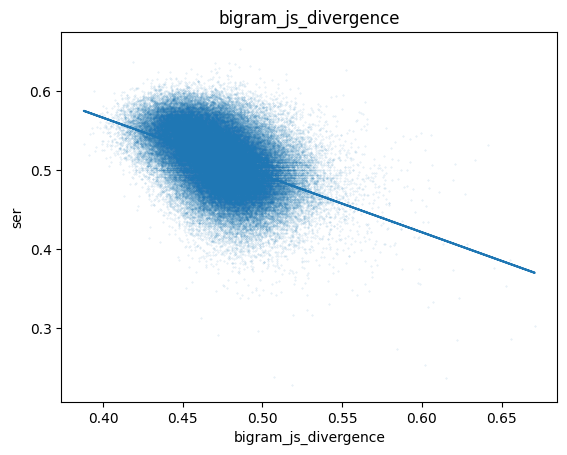

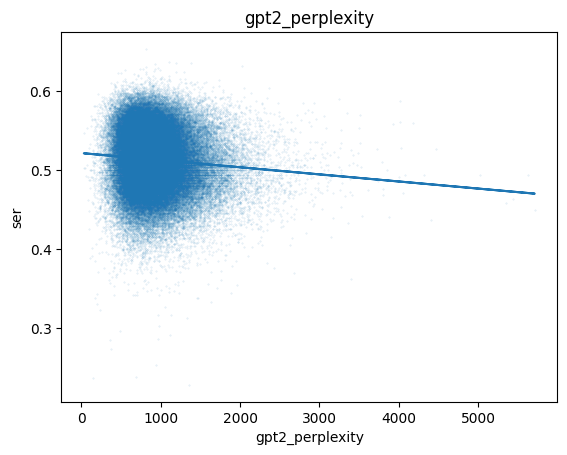

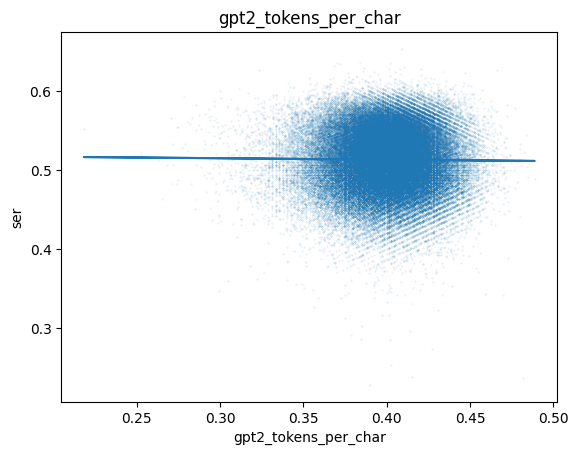

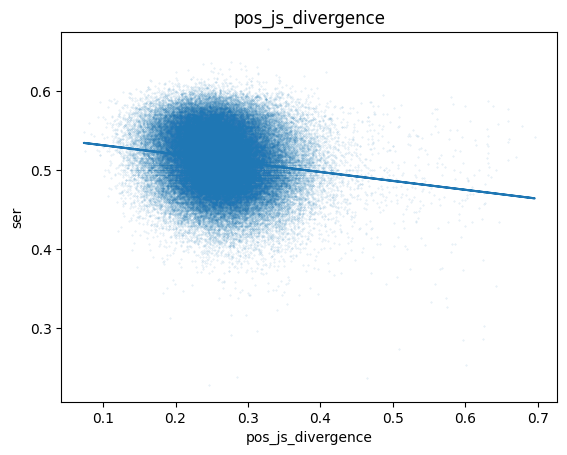

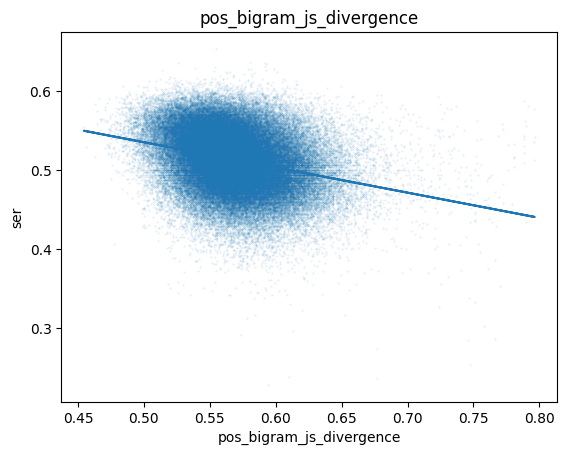

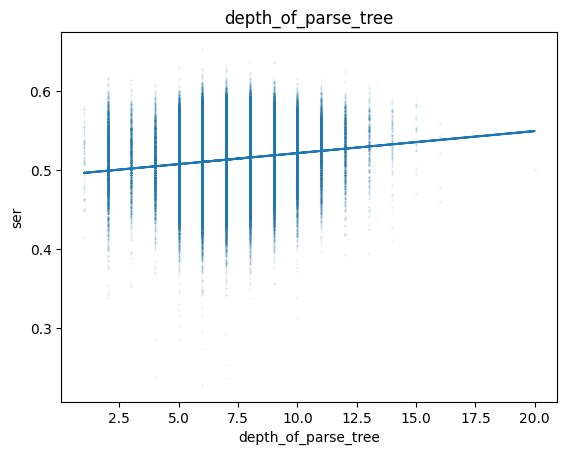

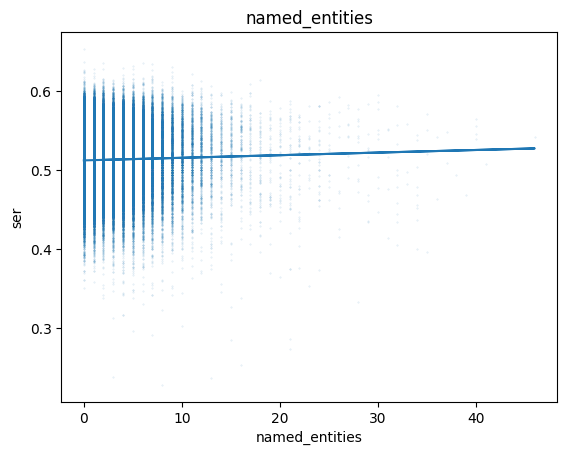

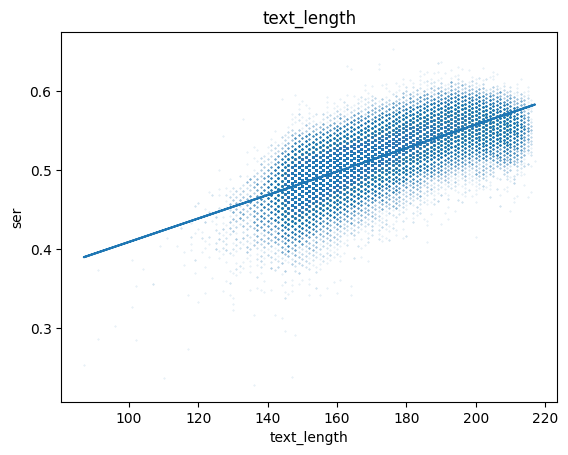

In [16]:
# cs
for feature in features:
    plt.scatter(data_cs[feature], data_cs['ser'], s=.1, alpha=.2)
    plt.xlabel(feature)
    plt.ylabel('ser')
    # draw a regression line through the data
    m, b = np.polyfit(data_cs[feature], data_cs['ser'], 1)
    plt.plot(data_cs[feature], m*data_cs[feature] + b)
    plt.title(feature)
    plt.show()

# now analyze conditional probabilities and what happens in the first N characters